<a href="https://colab.research.google.com/github/hansjang/Py_Radar/blob/main/%EB%8D%B0%EC%8B%B8%EB%9D%BC%EB%A9%B4Part4_P136.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. 데이터 확인
# from sklearn.datasets import load_boston  # deprecated by ethical issue
import numpy as np
import pandas as pd

# boston = load_boston()  # 보스턴 주택가격 데이터 로드
# boston_dt = boston.data # 독립변수(feature)만으로 된 numpy 형태
#price = boston.target   # 종속변수 값을 numpy 형태로 가짐

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# df = pd.DataFrame(boston_dt, columns = boston.feature_names)
# df['PRICE'] = price

df = pd.DataFrame(data, columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
                                   'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
                                   'LSTAT'])

df['PRICE'] = target

display(df)
display(df.shape)
display(df.info())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


(506, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


None

In [9]:
# 2. EDA (1) 결측치 확인
display(df.isna().sum())

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


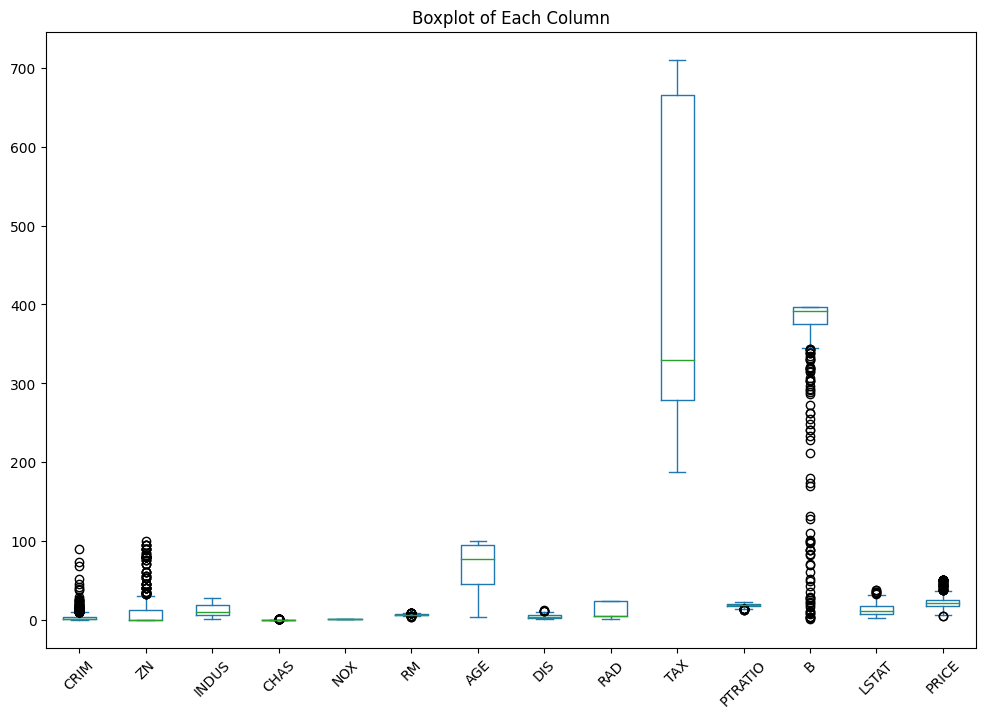

In [16]:
# 2. EDA (2) 이상치 확인
import matplotlib.pyplot as plt

df.plot(kind='box', figsize=(12, 8), rot=45, title='Boxplot of Each Column')

plt.show()

# 이상치의 영향력을 알 수 없으니, 이상치 제거, 혹은 대체는 일단 보류한다!

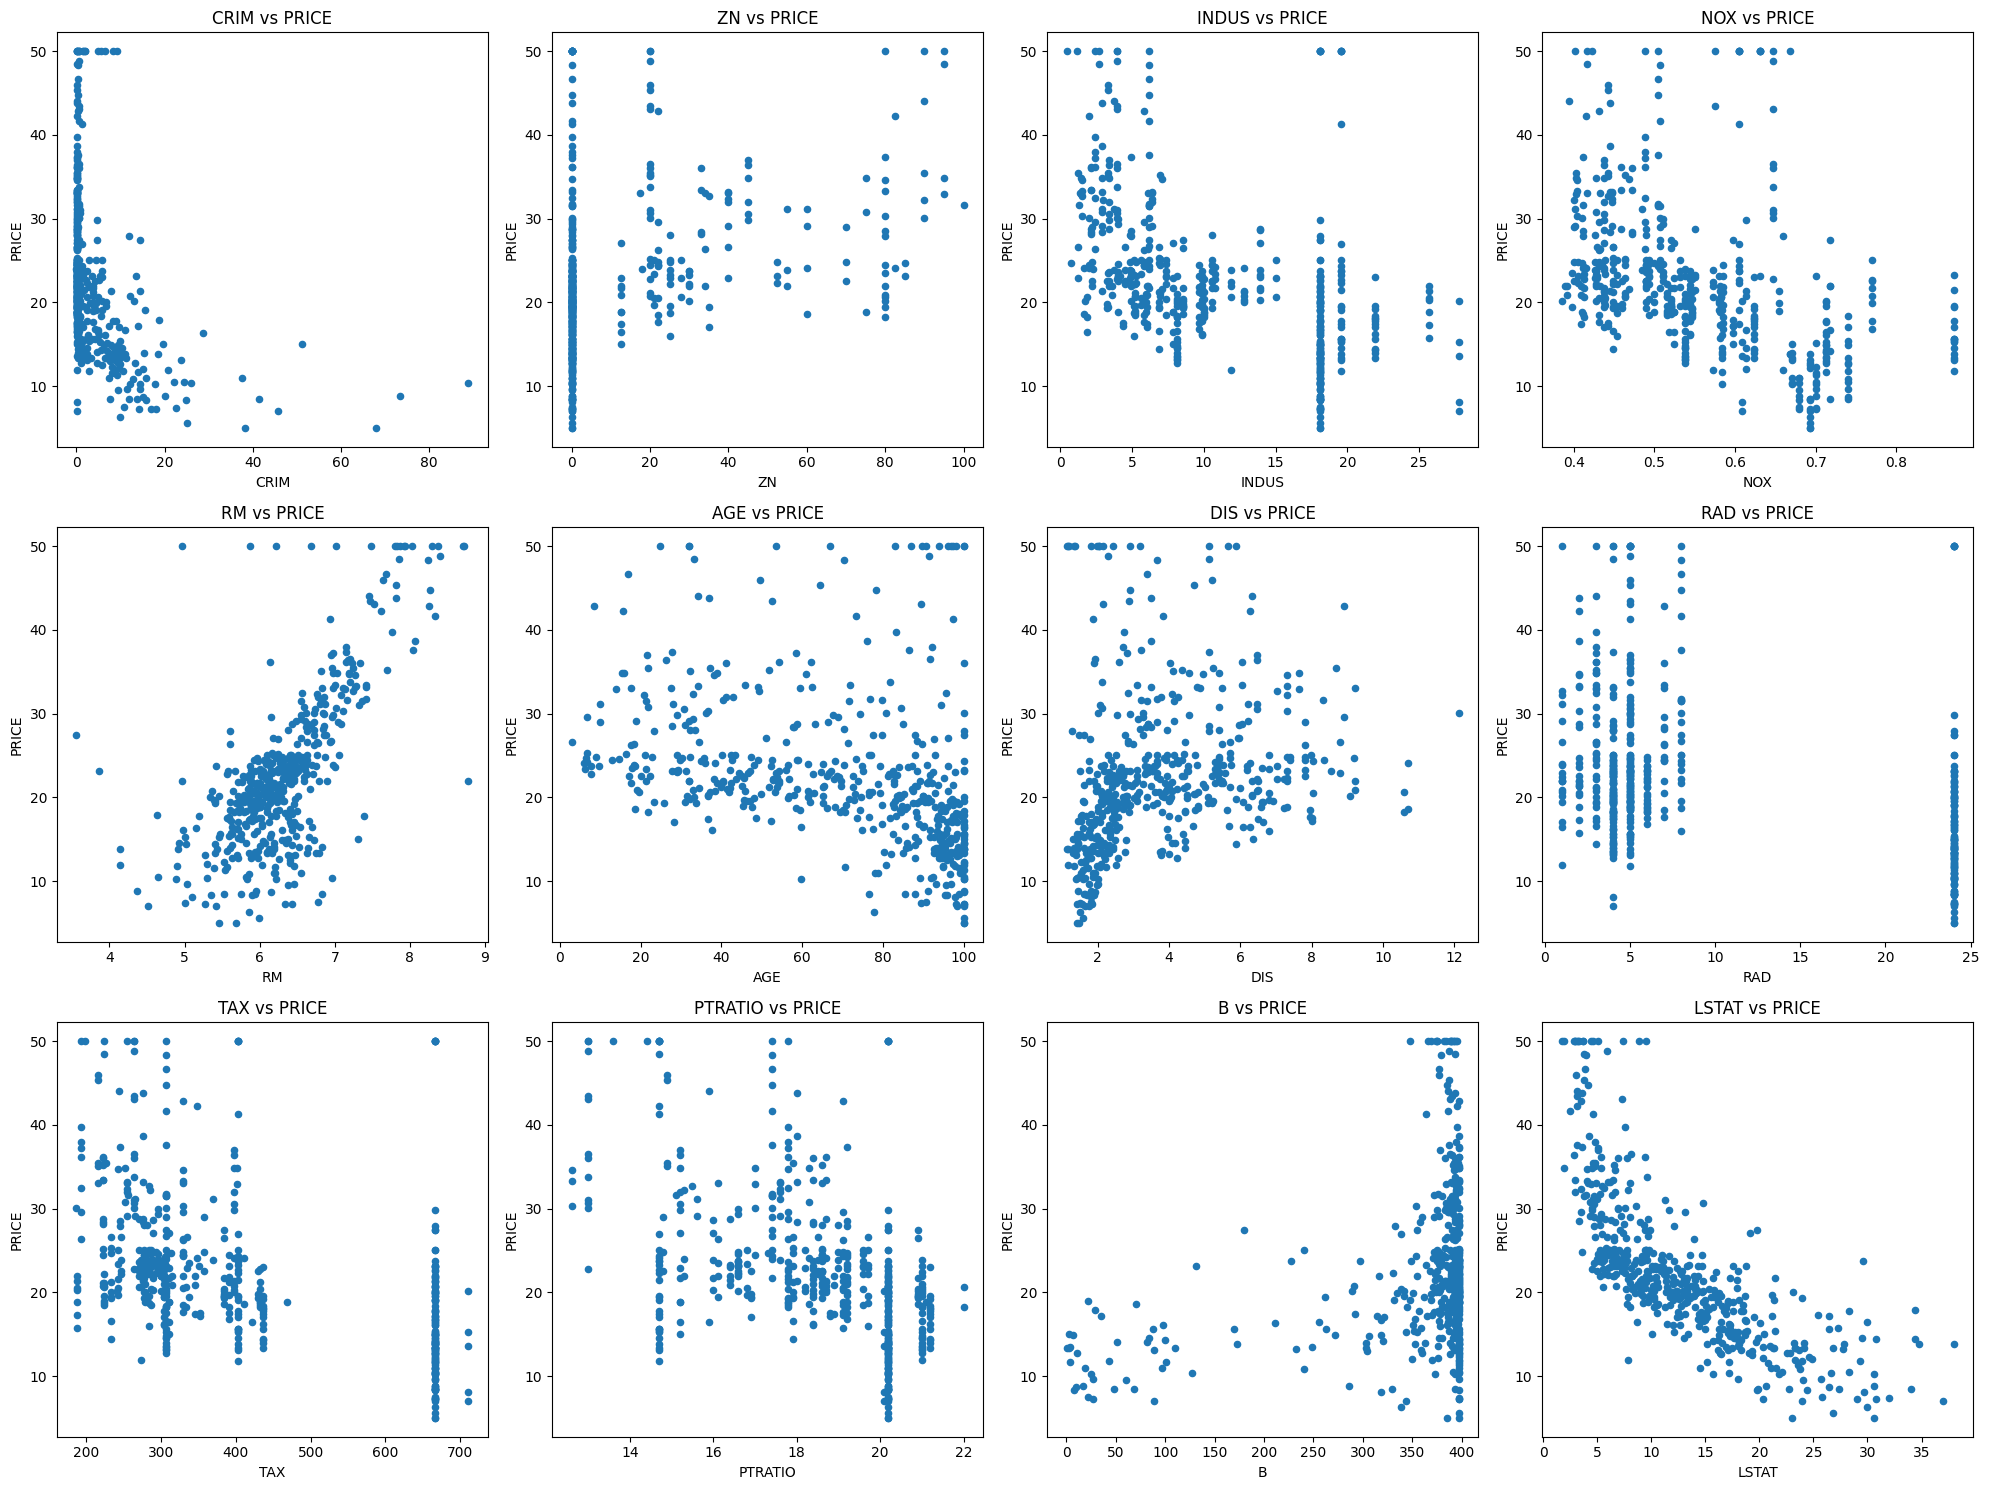

In [20]:
# 2. EDA (3) 독립변수와 종속변수간 선형관계 확인
import matplotlib.pyplot as plt
import seaborn as sns

# 독립변수 리스트
independent_vars = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM','AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B','LSTAT']  # 'CHAS', 'PRICE' 열을 제외한 독립변수
dependent_var = 'PRICE'  # 종속변수

# subplot 설정
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()  # 2D 배열을 1D 배열로 변환

# 각 subplot에 산점도 그리기
for i, col in enumerate(independent_vars):
    df.plot(kind='scatter', x=col, y=dependent_var, ax=axes[i], title=f'{col} vs {dependent_var}')

# 레이아웃 조정
plt.tight_layout()
plt.show()


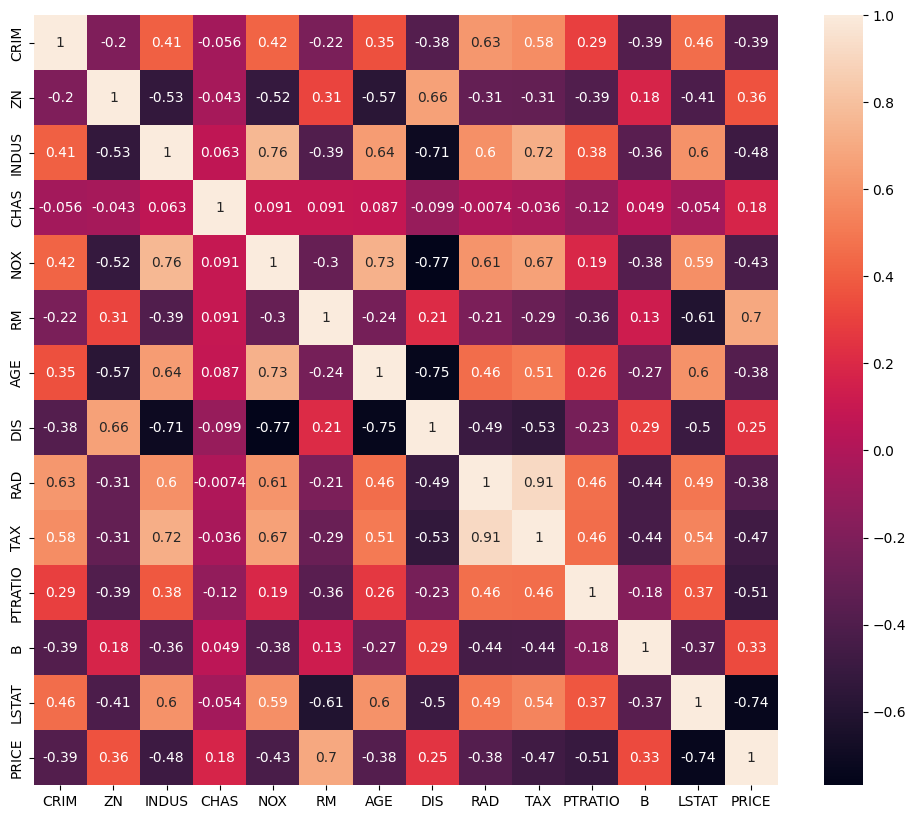

In [21]:
# 2. EDA (4) 독립변수와 종속변수간 상관관계 확인
import seaborn as sns

# 상관행렬
df_corr = df.corr(method='pearson')

# 히트맵 그리기
plt.figure(figsize=(12, 10))  # 가로 12인치, 세로 10인치
sns.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns, annot = True)
plt.show()

#### 종속변수 PRICE와 양(+)의 상관관계 변수 : RM(거주할 수 있는 방 개수) 0.7
#### 종속변수 PRICE와 음(-)의 상관관계 변수 : LSTAT(하위계층 비율) -0.74



In [4]:
# 3. 데이터 분할
from sklearn.model_selection import train_test_split

# ndarray 타입으로 변환한다.
x = df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM','AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B','LSTAT']].values
y = df['PRICE'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

# 종속변수의 평균 점검
print('학습데이터세트 PRICE 평균 : ', y_train.mean())
print('평가데이터세트 PRICE 평균 : ', y_test.mean())


학습데이터세트 PRICE 평균 :  22.796534653465343
평가데이터세트 PRICE 평균 :  21.488235294117644


In [13]:
# 4. 전처리 - 수치형변수 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [6]:
# 5. 모델학습 - 선형회귀
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train_scaled, y_train)

LinearRegression()

In [12]:
# 6. 모델평가 - 학습데이터
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

pred_train = linear.predict(x_train_scaled)

mae = mean_absolute_error(y_train, pred_train)
mse = mean_squared_error(y_train, pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, pred_train)

print('MAE : ', round(mae, 5))
print('MSE : ', round(mse, 5))
print('RMSE : ', round(rmse, 5))
print('R2 : ', round(r2, 5))

MAE :  3.32616
MSE :  22.11246
RMSE :  4.70239
R2 :  0.74546


모델의 설명력(R2)은 74.5%로 비교적 양호하다고 할 수 있다.
MAE를 통해 pred_train과 y_train은 평균 3.32 정도 차이를 보인다는 것을 알 수 있다.

In [14]:
# 6. 모델평가 - 평가데이터
## 수치형 변수 스케일링
x_test_scaled = scaler.transform(x_test)
# 이미 학습된 스케일러를 사용하기 위해 transform만 한다.
pred = linear.predict(x_test_scaled)

## 평가지표 출력
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print('MAE : ', round(mae, 5))
print('MSE : ', round(mse, 5))
print('RMSE : ', round(rmse, 5))
print('R2 : ', round(r2, 5))

MAE :  3.23724
MSE :  24.63539
RMSE :  4.96341
R2 :  0.66406


In [19]:
# 7. 예측값 저장
pred_df = pd.DataFrame(pred, columns=['pred Price'])
# print(pred_df.head())

## 실제값도 저장
actual_df = pd.DataFrame(y_test, columns=['actual Price'])
# print(actual_df.head())

## 실제값과 예측값 병합
reg_result = pd.concat([actual_df, pred_df], axis = 1)
display(reg_result.head())

## csv 파일로 저장
reg_result.to_csv('reg_result.csv', index=False, encoding='UTF-8-sig')

,actual Price,pred Price
0,23.6,29.218660
1,32.4,33.551467
2,13.6,14.810658
3,22.8,25.084725
4,16.1,19.173927
